# Database Query and Heatmap (V2)

Library Initialization

In [154]:
from Modules.database_gen_sqlite import gen_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

Database Generation Parameters

In [155]:
wall_width, wall_height = 72, 120
num_studs = 40
base_name = "test1"

Simulation Parameters

In [156]:
stud_probability = 0.25
base_stud_prob = 0.5
stud_type_length = 4

Generate Database

In [157]:
database_path = gen_data(base_name, wall_width, wall_height, num_studs, True)

Extract Data from database

In [158]:
# Connects to the database
con = sqlite3.connect(database_path)
cur = con.cursor()

In [159]:
# Query entire data in table
cur.execute("SELECT * from stud_locations")
data = cur.fetchall()
data[0]

(87, 28)

Save data into array

In [160]:
stud_array = np.zeros([wall_height+1, wall_width+1], dtype=float)

In [161]:
# Save coordinates to numpy array
for coord in data:
   x_coord, y_coord = coord[0], coord[1]
   
   if(stud_array[x_coord, y_coord] > 0):
      if(stud_array[x_coord, y_coord] < 1):
         stud_array[:, y_coord] = (stud_array[x_coord,y_coord] * stud_probability) + stud_array[x_coord,y_coord]

   else:
      stud_array[:, y_coord] = 0.5

   # Expand for stud length
   for y in range(1,stud_type_length,1):
      # Only if out of bounds
      if(y_coord+y < wall_width):
         if(stud_array[x_coord, y_coord+y] < 1 and stud_array[x_coord, y_coord+y] > 0):
            stud_array[:, y_coord+y] = (stud_array[x_coord,y_coord] * stud_probability) + stud_array[x_coord,y_coord]
            continue

         stud_array[:, y_coord+y] = 0.5

IndexError: index 72 is out of bounds for axis 1 with size 72

Stud Data Refinement

In [ ]:
stud_array[stud_array > 1] = 1
df = pd.DataFrame(stud_array)

Display Heatmap

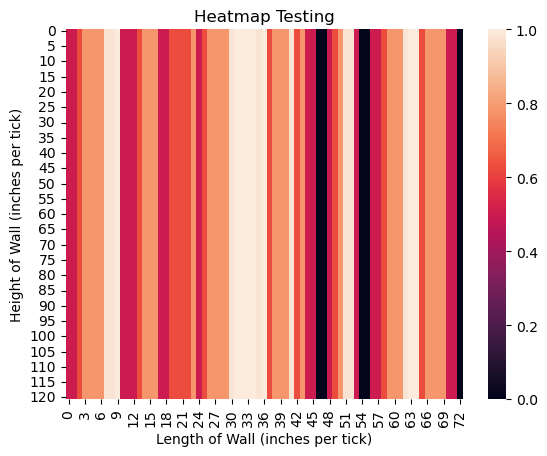

In [ ]:
heat = sns.heatmap(df, vmax=1)
heat.axes.set_xlabel("Length of Wall (inches per tick)")
heat.axes.set_ylabel("Height of Wall (inches per tick)")
heat.axes.set_title("Heatmap Testing")
plt.show()